In [2]:
# Module Import
import deep_nn as nn
import dropout_and_regularization as dr

# Package Import 
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import pandas as pd

from numpy.testing import assert_almost_equal


plt.tight_layout()

<Figure size 432x288 with 0 Axes>

#   Loading Data

In [3]:
def load_dataset():
    path = os.path.join(os.getcwd(), 'data', 'data.mat')
    data = sio.loadmat(path)

    x_train =  data['X'].T
    y_train =  data['y'].T

    x_test = data['Xval'].T
    y_test = data['yval'].T

    return x_train, y_train , x_test, y_test

In [4]:
x_train, y_train, x_test, y_test = load_dataset()

In [5]:
def correcting_aL(aL):
    aL[aL == 0] = 1e-10
    aL[aL == 1] = 1 - 1e-10

    return aL

In [6]:
def dropout_model(x, y,keep_probs = 0.86, learning_rate = 0.3, numm_iterations = 30000, print_cost = True):
    # 14% neurons will be dropped
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 20, 3,1]

    parameters = nn.initialize_paraeters_deep(layer_dims)


    for i in range(numm_iterations):
        np.random.seed(1)
        aL, caches, d_list = dr.dropout_L_model_forward(x, parameters ,keep_probs)
        aL = correcting_aL(aL)
        cost = nn.cross_entropy_cost(aL, y)
        grads = dr.dropout_L_model_backward(aL, y , caches, d_list, keep_probs)
        parameters = nn.update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print(f'Cost after iteration {i} is {cost}')


    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("iteration (x1000)")
    plt.title(f"Learning rate : {learning_rate}")
    plt.show()

    return parameters, costs

Cost after iteration 0 is 0.6543912405149825
Cost after iteration 1000 is 0.1759784892976791
Cost after iteration 2000 is 0.10396707442900774
Cost after iteration 3000 is 0.07661297787357768
Cost after iteration 4000 is 0.06719891269908362
Cost after iteration 5000 is 0.06466905008662006
Cost after iteration 6000 is 0.06240987260219459
Cost after iteration 7000 is 0.06187873532073922
Cost after iteration 8000 is 0.061433218161502844
Cost after iteration 9000 is 0.06119214376711353
Cost after iteration 10000 is 0.06101698658485821
Cost after iteration 11000 is 0.06093245083706894
Cost after iteration 12000 is 0.06082640197875734
Cost after iteration 13000 is 0.06086264131264571
Cost after iteration 14000 is 0.06083521538395621
Cost after iteration 15000 is 0.06066457217550576
Cost after iteration 16000 is 0.06064947239169945
Cost after iteration 17000 is 0.06062585663537528
Cost after iteration 18000 is 0.06065874507018473
Cost after iteration 19000 is 0.06059651331721738
Cost after ite

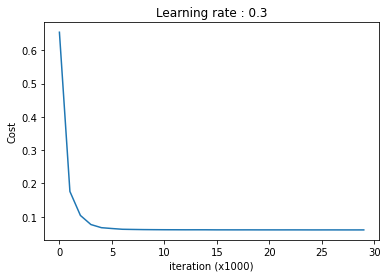



Training Accuracy =92.89099526066352 
Test Accuracy =95.0 


In [10]:
# cache, d_list = dropout_model(x_train, y_train)
dropout_parameters, dropout_cost = dropout_model(x_train, y_train)
print("\n")
_ = nn.predict(x_train, y_train, dropout_parameters)
_ = nn.predict(x_test, y_test, dropout_parameters, "Test")